In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
Noon_df = pd.read_csv('Noon_AppleWatch_data.csv')
Amazon_df = pd.read_csv('Amazon_AppleWatch_data.csv')

print("Noon Dataset:")
print(Noon_df.head())

print("\nAmazon Dataset:")
print(Amazon_df.head())

Noon Dataset:
                                        Product Name  AED Price  \
0  Apple Watch Series 8 GPS 41mm Aluminium Case W...    AED 887   
1  Apple Watch Series 10 GPS 46mm Jet Black Alumi...  AED 1,431   
2  Apple Watch SE (2024) GPS 40mm Starlight Alumi...    AED 725   
3  Apple Watch SE (2024) GPS 40mm Midnight Alumin...    AED 749   
4  Apple Watch SE (2024) GPS 44mm Midnight Alumin...    AED 840   

                                                Link  Rating Reviews  
0  https://www.noon.com/uae-en/watch-series-8-gps...     4.5    6.6K  
1  https://www.noon.com/uae-en/watch-series-10-gp...     4.7    3.6K  
2  https://www.noon.com/uae-en/watch-se-2024-gps-...     4.6    1.8K  
3  https://www.noon.com/uae-en/watch-se-2024-gps-...     4.6    1.8K  
4  https://www.noon.com/uae-en/watch-se-2024-gps-...     4.6    1.8K  

Amazon Dataset:
                                        Product Name   Price  \
0  Watch Series 9 GPS 41mm Midnight Aluminum Case...     NaN   
1  Watch SE 

In [3]:
# Extract numeric price and convert to float
Amazon_df['Price_Cleaned'] = Amazon_df['Price'].str.extract(r'(\d+(\.\d+)?)')[0].astype(float)

# Extract numeric rating and convert to float
Amazon_df['Rating_Cleaned'] = Amazon_df['Rating'].str.extract(r'(\d+(\.\d+)?)')[0].astype(float)

# Convert 'K' in reviews to '000'
Amazon_df['Reviews_Cleaned'] = Amazon_df['Reviews'].str.replace('K', '000', regex=False)

# Extract numeric reviews and convert to float
Amazon_df['Reviews_Cleaned'] = Amazon_df['Reviews_Cleaned'].str.extract(r'(\d+)')[0].astype(float)

print(Amazon_df[['Product Name', 'Price_Cleaned', 'Rating_Cleaned', 'Reviews_Cleaned']].head())


                                        Product Name  Price_Cleaned  \
0  Watch Series 9 GPS 41mm Midnight Aluminum Case...            NaN   
1  Watch SE (2nd Gen) [GPS 40mm] Smartwatch with ...            NaN   
2  Watch SE (2nd Gen) [GPS + Cellular 44mm] Smart...            NaN   
3  3 in 1 Waterproof Case for Apple Watch Series ...          11.98   
4  Stainless Steel Milanese Loop Compatible with ...          13.99   

   Rating_Cleaned  Reviews_Cleaned  
0             4.7            499.0  
1             4.6              3.0  
2             4.6              1.0  
3             4.5            120.0  
4             4.3              2.0  


In [4]:
# Clean price
Noon_df['Price_Cleaned'] = Noon_df['AED Price'].str.extract(r'(\d+(\.\d+)?)')[0].astype(float)

# Clean rating 
Noon_df['Rating_Cleaned'] = Noon_df['Rating'].astype(str).str.extract(r'(\d+(\.\d+)?)')[0].astype(float)

# Clean reviews
Noon_df['Reviews_Cleaned'] = Noon_df['Reviews'].astype(str).str.replace('K', '000', regex=False)
Noon_df['Reviews_Cleaned'] = Noon_df['Reviews_Cleaned'].str.extract(r'(\d+)')[0].astype(float)

Noon_df[['AED Price', 'Price_Cleaned', 'Rating', 'Rating_Cleaned', 'Reviews', 'Reviews_Cleaned']].head()


,AED Price,Price_Cleaned,Rating,Rating_Cleaned,Reviews,Reviews_Cleaned
0,AED 887,887.0,4.5,4.5,6.6K,6.0
1,"AED 1,431",1.0,4.7,4.7,3.6K,3.0
2,AED 725,725.0,4.6,4.6,1.8K,1.0
3,AED 749,749.0,4.6,4.6,1.8K,1.0
4,AED 840,840.0,4.6,4.6,1.8K,1.0


In [5]:
Amazon_df['Platform'] = 'Amazon'
Noon_df['Platform'] = 'Noon'

In [6]:
amazon_clean = Amazon_df[['Product Name', 'Price_Cleaned', 'Rating_Cleaned', 'Reviews_Cleaned', 'Platform']]
noon_clean = Noon_df[['Product Name', 'Price_Cleaned', 'Rating_Cleaned', 'Reviews_Cleaned', 'Platform']]


In [7]:
combined_df = pd.concat([amazon_clean, noon_clean], ignore_index=True)


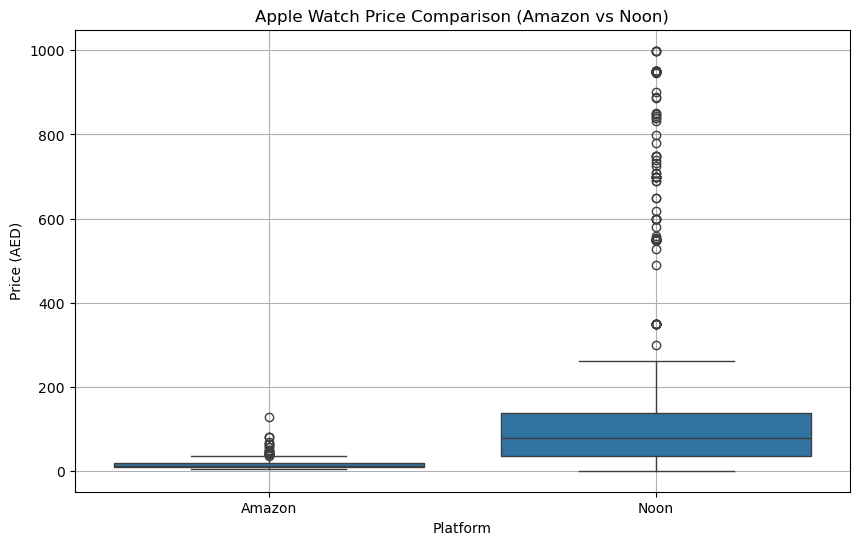

In [8]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Platform', y='Price_Cleaned', data=combined_df)
plt.title('Apple Watch Price Comparison (Amazon vs Noon)')
plt.ylabel('Price (AED)')
plt.grid(True)
plt.show()

# Product Availability Count (Simple & Clear)

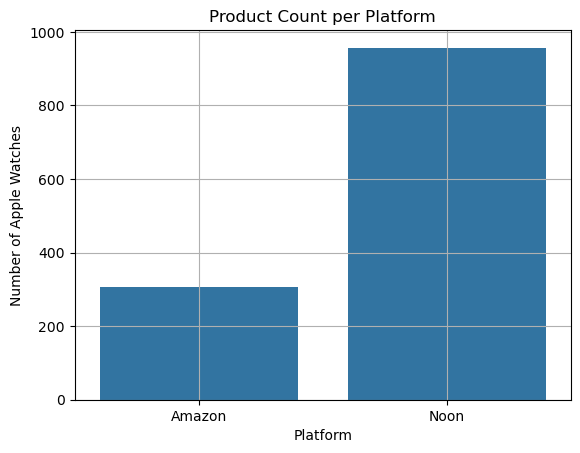

In [9]:
sns.countplot(x='Platform', data=combined_df)
plt.title("Product Count per Platform")
plt.ylabel("Number of Apple Watches")
plt.grid(True)
plt.show()

# Average Price Comparison (Most Important!)

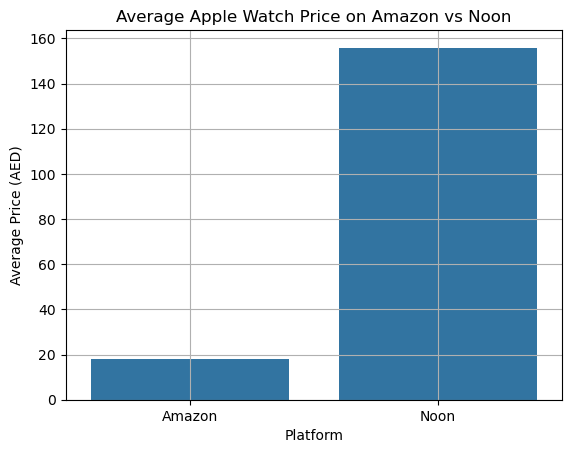

In [10]:
avg_price = combined_df.groupby("Platform")["Price_Cleaned"].mean().reset_index()
sns.barplot(x='Platform', y='Price_Cleaned', data=avg_price)
plt.title("Average Apple Watch Price on Amazon vs Noon")
plt.ylabel("Average Price (AED)")
plt.grid(True)
plt.show()

# Price vs Rating (For Insight)

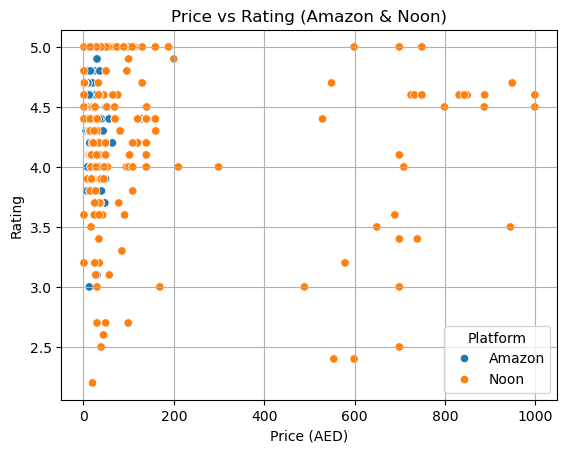

In [11]:
sns.scatterplot(data=combined_df, x='Price_Cleaned', y='Rating_Cleaned', hue='Platform')
plt.title("Price vs Rating (Amazon & Noon)")
plt.xlabel("Price (AED)")
plt.ylabel("Rating")
plt.grid(True)
plt.show()

# KDE Plot – Price Distribution Curve

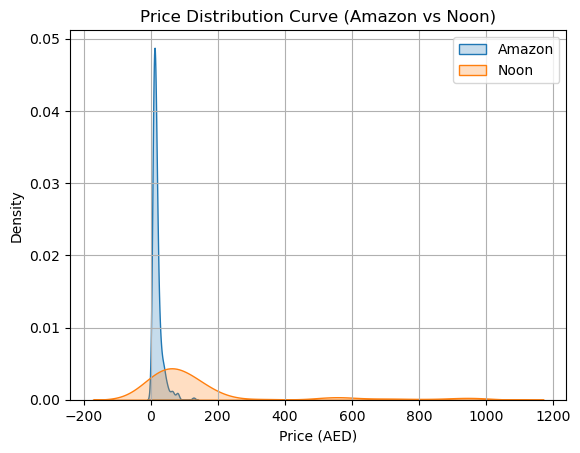

In [12]:
sns.kdeplot(data=amazon_clean['Price_Cleaned'], label='Amazon', fill=True)
sns.kdeplot(data=noon_clean['Price_Cleaned'], label='Noon', fill=True)
plt.title('Price Distribution Curve (Amazon vs Noon)')
plt.xlabel('Price (AED)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


# 📈 Bar Chart – Average Rating (Amazon vs Noon)

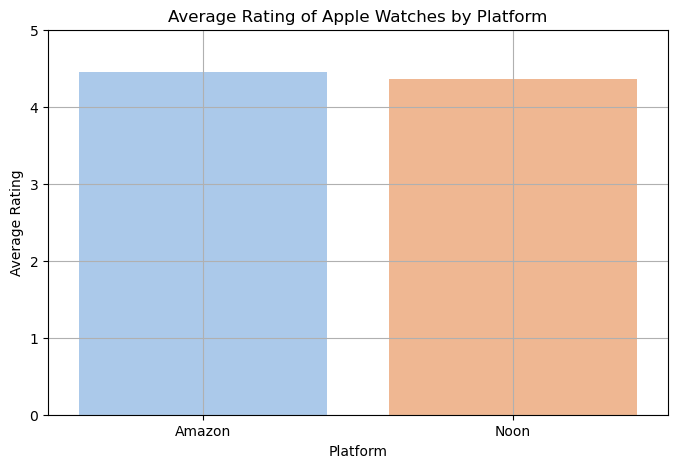

In [14]:

# Calculate average rating per platform
avg_ratings = combined_df.groupby("Platform")["Rating_Cleaned"].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x="Platform", y="Rating_Cleaned", hue="Platform", data=avg_ratings, palette="pastel", legend=False)
plt.title("Average Rating of Apple Watches by Platform")
plt.ylabel("Average Rating")
plt.xlabel("Platform")
plt.ylim(0, 5)  # Ratings range from 0 to 5
plt.grid(True)
plt.show()
